## Import libraries

In [118]:
# import libraris
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
import platform
from tensorflow.keras.layers import Dropout

## Load images & Extract images

In [119]:
# load train images and train labels
train_x, train_y = loadlocal_mnist(
                    images_path='train-images.idx3-ubyte', 
                    labels_path='train-labels.idx1-ubyte')

In [120]:
print('Dimensions: %s x %s' % (train_x.shape[0], train_x.shape[1]))          # shape
# trainX has 60000 and testX has 10000 images
# Each image (in trainX and testX) is 28 pixel x 28 pixel
# Labels are 8-bit unsigned integers

Dimensions: 60000 x 784


In [121]:
# size of the dataset
print('features:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(train_y))
print('Class distribution: %s' % np.bincount(train_y))

features:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [122]:
print(train_x.shape)
print(train_y.shape)

(60000, 784)
(60000,)


For test images

In [123]:
# load train images and train labels
test_x, test_y = loadlocal_mnist(
            images_path='/content/t10k-images.idx3-ubyte', 
            labels_path='/content/t10k-labels.idx1-ubyte')

In [124]:
print('Dimensions: %s x %s' % (test_x.shape[0], test_x.shape[1])) 

Dimensions: 10000 x 784


In [125]:
# size of the dataset
print('features:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(test_y))
print('Class distribution: %s' % np.bincount(test_y))

features:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


In [126]:
print(test_x.shape)
print(test_y.shape)

(10000, 784)
(10000,)


## Data Pre-processing

In [127]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [128]:
print(type(train_x), type(train_y), type(test_x), type(test_y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


Flatten Images

In [129]:
#Flatten the imput images
test_x =test_x.reshape(-1,784)
train_x =train_x.reshape(-1, 784)
#train_x[2]

Normalization

In [130]:
# normalize input
train_x = train_x / 255.0
test_x = test_x / 255.0
#print(train_x[2])

Convert Output to One-hot Vector

In [131]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
train_y = onehot_encoder.fit_transform(train_y.reshape(-1, 1))
test_y_reshaped = onehot_encoder.fit_transform(test_y.reshape(-1, 1))
print(train_y[2], '\n', test_y_reshaped[2])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Classification with CNN, Adam optimizer

In [132]:
adam_model = tf.keras.Sequential()

adam_model.add(tf.keras.layers.Dense(200, activation='relu', input_shape= (784, )))
#adam_model.add(Dropout(0.2))
adam_model.add(tf.keras.layers.Dense(100, activation='relu'))
#adam_model.add(Dropout(0.2))
adam_model.add(tf.keras.layers.Dense(60, activation='relu'))
#adam_model.add(Dropout(0.2))
adam_model.add(tf.keras.layers.Dense(30, activation='relu'))
#adam_model.add(Dropout(0.2))

adam_model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
adam_model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [133]:
adam_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 200)               157000    
                                                                 
 dense_67 (Dense)            (None, 100)               20100     
                                                                 
 dense_68 (Dense)            (None, 60)                6060      
                                                                 
 dense_69 (Dense)            (None, 30)                1830      
                                                                 
 dense_70 (Dense)            (None, 10)                310       
                                                                 
Total params: 185,300
Trainable params: 185,300
Non-trainable params: 0
_________________________________________________________________


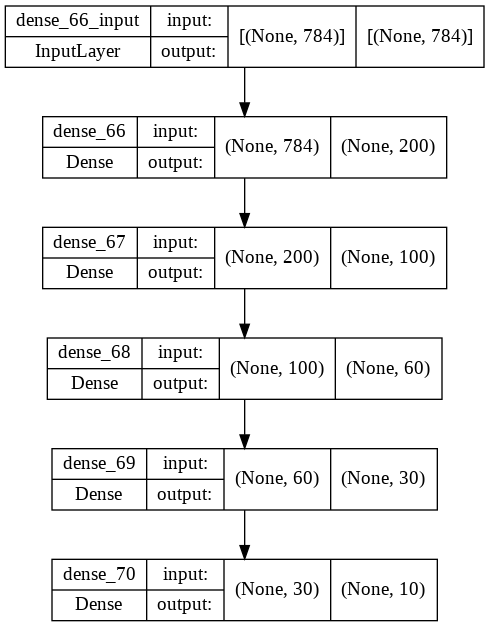

In [134]:
# Test
from keras.utils.vis_utils import plot_model
plot_model(adam_model, show_shapes=True, show_layer_names=True)

In [135]:
adam_history  = adam_model.fit(train_x, train_y, validation_data=(test_x, test_y_reshaped), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3101 - accuracy: 0.9136 - val_loss: 0.2028 - val_accuracy: 0.9471
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2160 - accuracy: 0.9482 - val_loss: 0.1985 - val_accuracy: 0.9524
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1884 - accuracy: 0.9548 - val_loss: 0.1868 - val_accuracy: 0.9540
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1664 - accuracy: 0.9605 - val_loss: 0.1948 - val_accuracy: 0.9550
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1531 - accuracy: 0.9645 - val_loss: 0.1855 - val_accuracy: 0.9558
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1506 - accuracy: 0.9645 - val_loss: 0.1886 - val_accuracy: 0.9556
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1553 - accuracy: 0.9645 - val_loss: 0.1697 - val_accurac

Performance evaluation

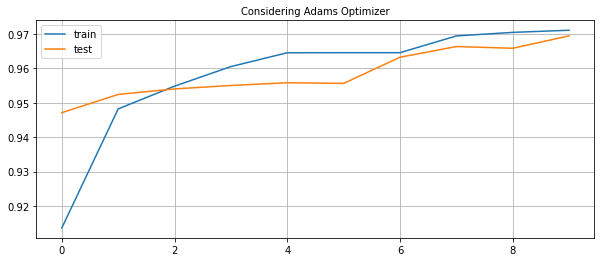

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 4))
plt.plot(adam_history.history['accuracy'], label='train')
plt.plot(adam_history.history['val_accuracy'], label='test')
plt.grid(True)
plt.legend(fontsize=10)
plt.title('Considering Adams Optimizer', fontsize=10)
plt.show()

In [137]:
y_pred = adam_model.predict(test_x)

In [96]:
test_y

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [139]:
adam_y_pred_labels = []
for i in y_pred:
    adam_y_pred_labels.append(np.argmax(i))

In [140]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(adam_y_pred_labels, test_y))

[[ 967    0    6    0    0    2    6    1    5    1]
 [   0 1104    0    0    0    0    3    0    0    2]
 [   0    5  998    2    0    0   21    7    7    1]
 [   0    4    5  982    1    6    0    2    3   10]
 [   0    0    1    0  952    0    1    0    2   21]
 [   2    1    0    9    0  868  333    1    5   14]
 [   1    3    3    0    4    7  588    0    4    0]
 [   1    3    6    8    3    0    0 1010    4    9]
 [   9   15   13    9    9    9    6    4  940   17]
 [   0    0    0    0   13    0    0    3    4  934]]


Text(0.5, 42.0, 'Predicted')

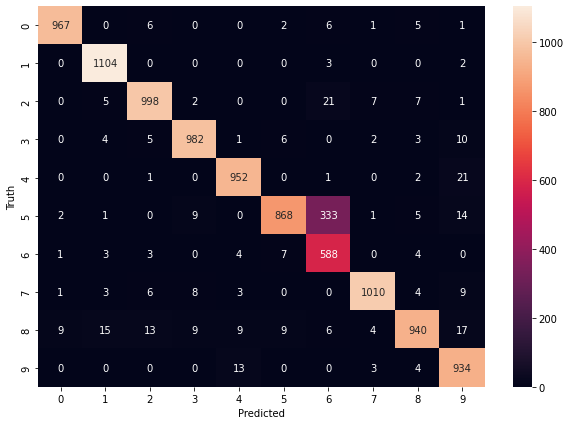

In [141]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(adam_y_pred_labels, test_y), annot = True, fmt = 'd')
plt.ylabel('Truth')
plt.xlabel('Predicted')

In [142]:
from sklearn.metrics import classification_report
print(classification_report(adam_y_pred_labels, test_y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       988
           1       0.97      1.00      0.98      1109
           2       0.97      0.96      0.96      1041
           3       0.97      0.97      0.97      1013
           4       0.97      0.97      0.97       977
           5       0.97      0.70      0.82      1233
           6       0.61      0.96      0.75       610
           7       0.98      0.97      0.97      1044
           8       0.97      0.91      0.94      1031
           9       0.93      0.98      0.95       954

    accuracy                           0.93     10000
   macro avg       0.93      0.94      0.93     10000
weighted avg       0.95      0.93      0.94     10000



Testing the model

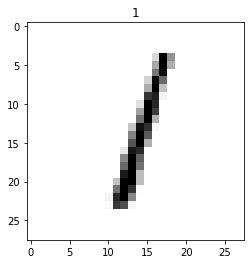

In [143]:
predictions = adam_model.predict(test_x)

plt.title(np.argmax(predictions[2], axis=0))
plt.imshow(test_x[2].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

## Classification with CNN, RMS prop optimizer

In [144]:
rms_model = tf.keras.Sequential()

rms_model.add(tf.keras.layers.Dense(200, activation='relu', input_shape= (784, )))
#rms_model.add(Dropout(0.2))
rms_model.add(tf.keras.layers.Dense(100, activation='relu'))
#rms_model.add(Dropout(0.2))
rms_model.add(tf.keras.layers.Dense(60, activation='relu'))
#rms_model.add(Dropout(0.2))
rms_model.add(tf.keras.layers.Dense(30, activation='relu'))
#rms_model.add(Dropout(0.2))

rms_model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

rms_prop_optimizer = tf.keras.optimizers.RMSprop(lr=0.01)
rms_model.compile(optimizer=rms_prop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [145]:
rms_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 200)               157000    
                                                                 
 dense_72 (Dense)            (None, 100)               20100     
                                                                 
 dense_73 (Dense)            (None, 60)                6060      
                                                                 
 dense_74 (Dense)            (None, 30)                1830      
                                                                 
 dense_75 (Dense)            (None, 10)                310       
                                                                 
Total params: 185,300
Trainable params: 185,300
Non-trainable params: 0
_________________________________________________________________


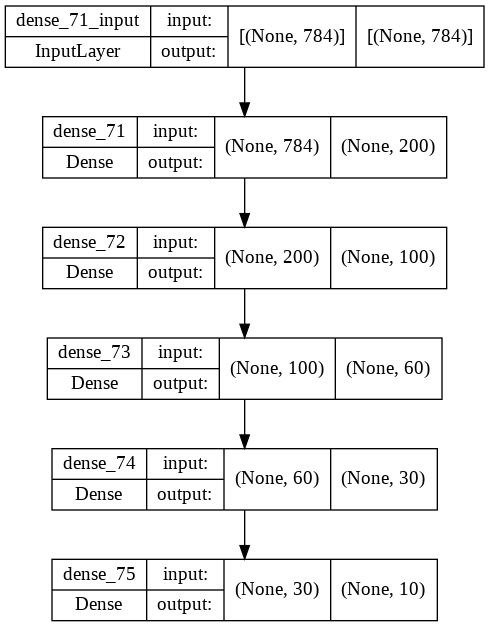

In [146]:
# Test
from keras.utils.vis_utils import plot_model
plot_model(rms_model, show_shapes=True, show_layer_names=True)

In [147]:
rms_history  = rms_model.fit(train_x, train_y, validation_data=(test_x, test_y_reshaped), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4402 - accuracy: 0.8949 - val_loss: 0.3509 - val_accuracy: 0.9149
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4074 - accuracy: 0.9294 - val_loss: 0.3285 - val_accuracy: 0.9458
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4370 - accuracy: 0.9257 - val_loss: 0.3169 - val_accuracy: 0.9456
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5501 - accuracy: 0.9171 - val_loss: 0.5963 - val_accuracy: 0.9383
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6242 - accuracy: 0.9103 - val_loss: 0.4836 - val_accuracy: 0.9196
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6284 - accuracy: 0.9054 - val_loss: 0.6967 - val_accuracy: 0.8861
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7432 - accuracy: 0.8721 - val_loss: 1.1671 - val_ac

Performance evaluation

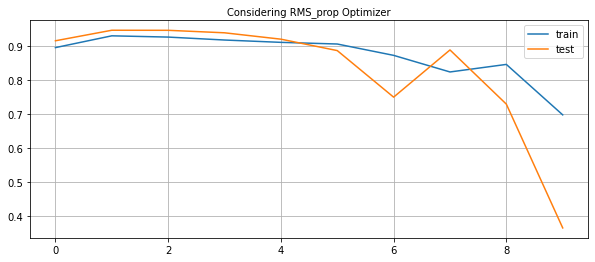

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 4))
plt.plot(rms_history.history['accuracy'], label='train')
plt.plot(rms_history.history['val_accuracy'], label='test')
plt.grid(True)
plt.legend(fontsize=10)
plt.title('Considering RMS_prop Optimizer', fontsize=10)
plt.show()

In [150]:
rms_y_pred = adam_model.predict(test_x)

In [151]:
rms_y_pred_labels = []
for i in rms_y_pred:
    rms_y_pred_labels.append(np.argmax(i))

In [152]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(rms_y_pred_labels, test_y))

[[ 967    0    6    0    0    2    6    1    5    1]
 [   0 1104    0    0    0    0    3    0    0    2]
 [   0    5  998    2    0    0   21    7    7    1]
 [   0    4    5  982    1    6    0    2    3   10]
 [   0    0    1    0  952    0    1    0    2   21]
 [   2    1    0    9    0  868  333    1    5   14]
 [   1    3    3    0    4    7  588    0    4    0]
 [   1    3    6    8    3    0    0 1010    4    9]
 [   9   15   13    9    9    9    6    4  940   17]
 [   0    0    0    0   13    0    0    3    4  934]]


Text(0.5, 42.0, 'Predicted')

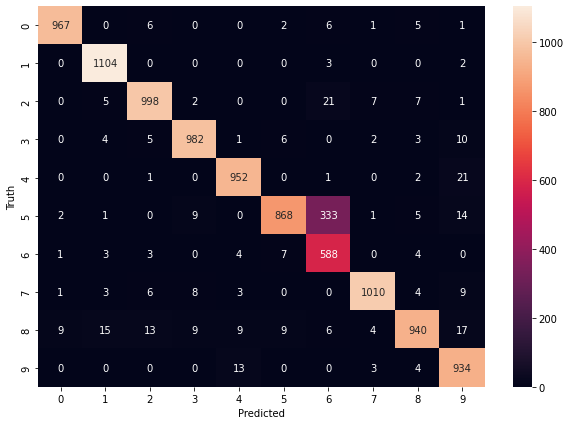

In [153]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(rms_y_pred_labels, test_y), annot = True, fmt = 'd')
plt.ylabel('Truth')
plt.xlabel('Predicted')

In [154]:
from sklearn.metrics import classification_report
print(classification_report(rms_y_pred_labels, test_y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       988
           1       0.97      1.00      0.98      1109
           2       0.97      0.96      0.96      1041
           3       0.97      0.97      0.97      1013
           4       0.97      0.97      0.97       977
           5       0.97      0.70      0.82      1233
           6       0.61      0.96      0.75       610
           7       0.98      0.97      0.97      1044
           8       0.97      0.91      0.94      1031
           9       0.93      0.98      0.95       954

    accuracy                           0.93     10000
   macro avg       0.93      0.94      0.93     10000
weighted avg       0.95      0.93      0.94     10000



Testing the model

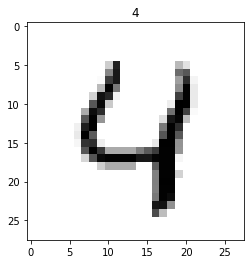

In [155]:
predictions = rms_model.predict(test_x)

plt.title(np.argmax(predictions[3], axis=0))
plt.imshow(test_x[4].reshape(28, 28), cmap=plt.cm.binary)
plt.show()